<a href="https://colab.research.google.com/github/cbishop4/MSE7530/blob/main/KWWfitting_wErrors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [82]:
! git clone https://github.com/cbishop4/MSE7530

fatal: destination path 'MSE7530' already exists and is not an empty directory.


In [83]:
def KWW(time, r_0, tau,beta,C):
  return r_0 * np.exp(-(time/tau)**beta) + C

## Calculating the Autocorrelation Function from scratch

In [8]:
#
pd.read_csv('/content/MSE7530/sampledata/IperpIpara.csv',header=0)

,Iperp,Unnamed: 1,Ipara,Unnamed: 3
0,X,Y,X,Y
1,-0.022933149868094915,5932.60520582502,2.1684567264202315,4583.9143064633245
2,13.782823070748805,5813.037495700034,20.82657624453293,4715.16290726817
3,23.644077514046558,5908.44513243894,28.90341321713879,4825.679394564843
4,40.73691854909612,5741.296869625043,44.49358690844758,4924.362376529559
...,...,...,...,...
90,1918.6954313889305,5496.1742591773545,NaN,NaN
91,1948.5609448457749,5498.340213278294,NaN,NaN
92,1977.7502579979364,5518.235294117647,NaN,NaN
93,1991.950464396285,5463.2094943240445,NaN,NaN


In [12]:
df_I = pd.read_csv('/content/MSE7530/sampledata/IperpIpara.csv',header=1)
df_I = df_I.rename(columns={'X': 'tperp', 'Y': 'Iperp', 'X.1': 'tpara', 'Y.1': 'Ipara'})

In [13]:
df_I

,tperp,Iperp,tpara,Ipara
0,-0.022933,5932.605206,2.168457,4583.914306
1,13.782823,5813.037496,20.826576,4715.162907
2,23.644078,5908.445132,28.903413,4825.679395
3,40.736919,5741.296870,44.493587,4924.362377
4,39.422085,5830.048160,70.539821,5007.619539
...,...,...,...,...
89,1918.695431,5496.174259,NaN,NaN
90,1948.560945,5498.340213,NaN,NaN
91,1977.750258,5518.235294,NaN,NaN
92,1991.950464,5463.209494,NaN,NaN


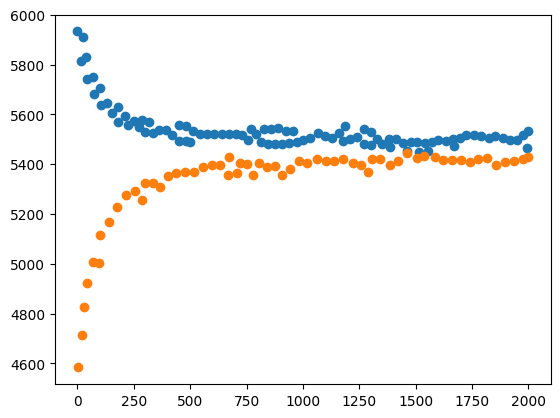

In [69]:
plt.plot(df_I['tperp'], df_I['Iperp'],'o')
plt.plot(df_I['tpara'], df_I['Ipara'],'o')

### Aside: data interpolation

In [70]:
## Need to interpolate
from scipy.interpolate import interp1d
fperp = interp1d(df_I['tperp'], df_I['Iperp'])

In [71]:
newperp = fperp(df_I['tpara'])

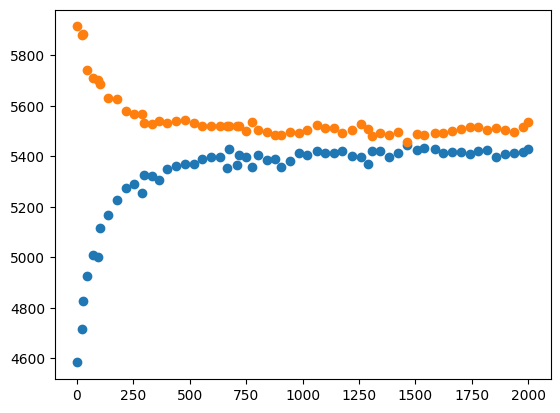

In [75]:
plt.plot(df_I['tpara'], df_I['Ipara'],'o')
plt.plot(df_I['tpara'], newperp,'o')

## Make these into the correlation function

In [27]:
t = df_I['tpara']
Ipara = df_I['Ipara']
Iperp = newperp

In [28]:
r = (Ipara - Iperp) / (Ipara + 2*Iperp)

[]

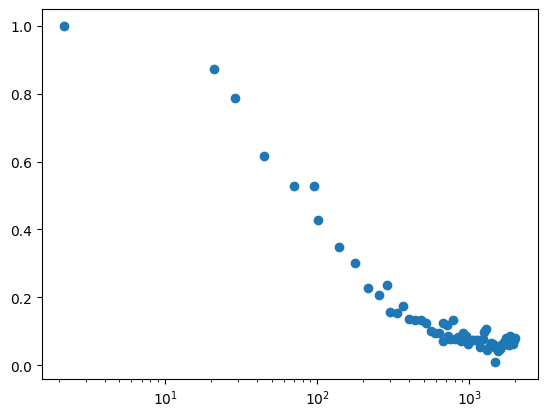

In [33]:
plt.plot(t,r/(r[0]),'o')
plt.semilogx()

## KWW fitting (repeated from last time)

In [34]:
K315 = pd.read_csv('/content/MSE7530/sampledata/315K.csv',header=None)
K317 = pd.read_csv('/content/MSE7530/sampledata/317K.csv',header=None)
K320 = pd.read_csv('/content/MSE7530/sampledata/320K.csv',header=None)
K323 = pd.read_csv('/content/MSE7530/sampledata/323K.csv',header=None)

[]

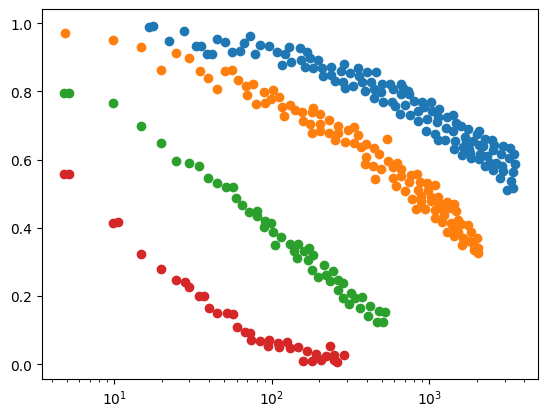

In [35]:
for k in [K315, K317, K320, K323]:
  plt.plot(k[0],k[1],'o')
plt.semilogx()

In [36]:
from scipy.optimize import curve_fit

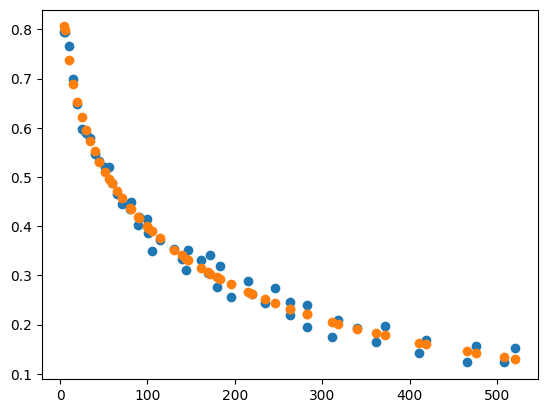

In [57]:
curve = K320
popt, pcov = curve_fit(KWW, curve[0], curve[1])
plt.plot(curve[0], curve[1],'o')
plt.plot(curve[0], KWW(curve[0],*popt),'o')

In [42]:
pcov

array([[ 2.06099186e-02,  2.20686255e+00, -1.05755932e-02,
        -1.05175831e-02],
       [ 2.20686255e+00,  4.97083441e+02, -1.08499443e+00,
        -1.45676930e+00],
       [-1.05755932e-02, -1.08499443e+00,  5.49898764e-03,
         5.33674811e-03],
       [-1.05175831e-02, -1.45676930e+00,  5.33674811e-03,
         5.79273397e-03]])

In [44]:
np.diag(pcov)

array([2.06099186e-02, 4.97083441e+02, 5.49898764e-03, 5.79273397e-03])

In [46]:
errbars = np.sqrt(np.diag(pcov))

In [47]:
print(f'The fit parameters are r_0 = {popt[0]}, tau = {popt[1]}, beta = {popt[2]}, and C = {popt[3]}')
print(f'The errors on the fit parameters are r_0 = {errbars[0]}, tau = {errbars[1]}, beta = {errbars[2]}, and C = {errbars[3]}')

The fit parameters are r_0 = 1.034810475550607, tau = 123.565980952591, beta = 0.4579374867908582, and C = -0.01928407889788452
The errors on the fit parameters are r_0 = 0.14356154988828732, tau = 22.295368155889914, beta = 0.07415515920067212, and C = 0.07611001226547172


In [ ]:
def KWW(time, r_0, tau,beta,C):
  return r_0 * np.exp(-(time/tau)**beta) + C

### Fixing parameters
We know that the correlation function is equal to 1 at t = 0, and that our parameter C is equal to 0. We could rewrite the equation, or we could fix these in our fitting.



/tmp/ipython-input-197644910.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(KWW, curve[0], curve[1])


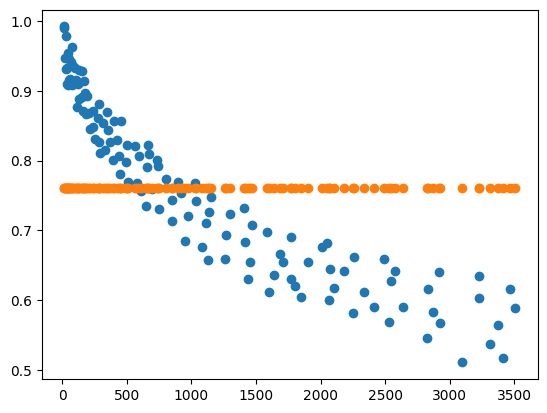

In [58]:
curve = K315
popt, pcov = curve_fit(KWW, curve[0], curve[1])
plt.plot(curve[0], curve[1],'o')
plt.plot(curve[0], KWW(curve[0],*popt),'o')

Question: Why did this fail?

In [84]:
bounds = ([0.9999, 0.0, 0., 0.], [1.0001, 1000., 1.0, 0.00001])

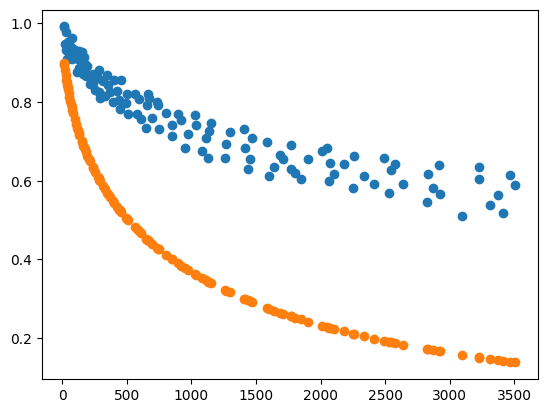

In [85]:
curve = K315
popt, pcov = curve_fit(KWW, curve[0], curve[1],bounds=bounds)
plt.plot(curve[0], curve[1],'o')
plt.plot(curve[0], KWW(curve[0],*popt),'o')

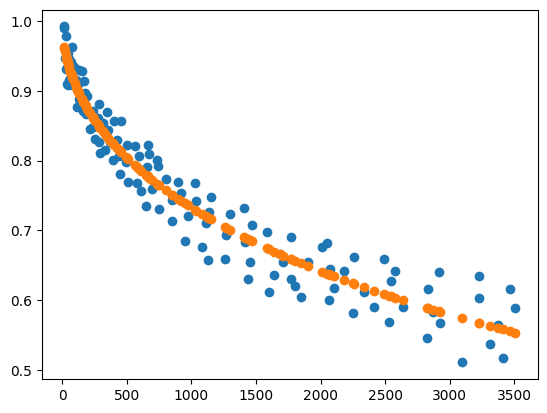

In [86]:
bounds = ([0.9999, 100.0, 0., 0.], [1.0001, 100000., 1.0, 0.00001])
curve = K315
popt, pcov = curve_fit(KWW, curve[0], curve[1],bounds=bounds)
plt.plot(curve[0], curve[1],'o')
plt.plot(curve[0], KWW(curve[0],*popt),'o')

In [79]:
np.sqrt(np.diag(pcov))

array([1.00200492e+00, 2.70870563e+04, 1.65548413e-01, 9.71502041e-01])

In [80]:
popt

array([1.00010000e+00, 9.77242793e+03, 5.11640386e-01, 1.00000000e-05])

## Task: Find the effect of fixing $r_{0}$ and $C$ on error bars.

## Task: Plot the values of $\tau$ and $\beta$ as a function of temperature, with errors

## How does strain affect the $\tau_{KWW}$ of PLA glasses?

In [ ]:
dfstrain = pd.read_csv('/content/MSE7530/sampledata/315K.csv',header=None)